In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
train_data = pd.read_csv("data/train_data.csv")

# EDA

In [35]:
train_data.head(10)

,eventTimestamp,unitDisplayType,brandName,bundleId,appVersion,correctModelName,countryCode,deviceId,osAndVersion,connectionType,c1,c2,c3,c4,size,mediationProviderVersion,bidFloorPrice,sentPrice,winBid,has_won
0,1656411567773,banner,LG,com.tilegarden.match3,1.8.22,LM-V405,US,74f9b473fad,Android-10.0,3G,cb2,6.0,6b,4.0,320x50,11.2.1,0.01,0.02,0.88,0
1,1656925395488,banner,Generic,com.loop.match3d,1245.34.0,Android 4.0,FR,6ad4c88b84e,Android-4.0,WIFI,7d3,6.0,6b,6.0,320x50,11.4.2,0.01,0.03,0.08,0
2,1656913751642,banner,Generic,com.loop.match3d,1245.35.0,Android 4.0,US,743b9849642,Android-4.0,WIFI,7d3,3.0,6b,3.0,320x50,11.4.3,0.01,0.02,1.72,0
3,1656656319103,banner,Generic,com.loop.match3d,1245.34.0,Android 4.0,GB,6ad933115b2,Android-4.0,WIFI,7d3,3.0,6b,5.0,320x50,11.4.2,0.01,0.06,0.21,0
4,1657429389462,interstitial,OPPO,com.loop.match3d,1245.35.0,CPH2127,ID,809f9785bb3,Android-11.0,WIFI,8bd,3.0,6b,3.0,320x480,11.4.3,0.01,0.16,1.91,0
5,1656733933530,banner,Motorola,com.loop.match3d,1245.35.0,One 5G UW,US,744b742a55a,Android-11.0,WIFI,7d3,6.0,6b,8.0,320x50,11.4.3,0.01,0.02,1.90,0
6,1656764469359,banner,AT&T,com.tilegarden.match3,1.7.83,V350U,US,74c69ddbf47,Android-10.0,3G,cb2,9.0,6b,5.0,320x50,11.1.1,0.01,0.13,1.47,0
7,1657304610451,banner,Samsung,com.loop.match3d,1245.35.0,SM-T227U,US,74c110245b1,Android-11.0,3G,7d3,7.0,6b,2.0,728x90,11.4.3,0.01,0.03,2.10,0
8,1656878804685,banner,Samsung,com.tintash.nailsalon,1.3.6,SM-A032M,BR,80155787fb4,Android-11.0,WIFI,ad3,3.0,6b,8.0,320x50,11.3.3,0.01,0.02,0.14,0
9,1656535501552,banner,Apple,1502447854,1245.34.0,iPhone,RU,74d720f8fb3,iOS-14.4.2,WIFI,59b,9.0,79,9.0,320x50,11.4.1,0.01,0.02,0.20,0


In [36]:
train_data.info(memory_usage="deep", show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7321633 entries, 0 to 7321632
Data columns (total 20 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   eventTimestamp            7321633 non-null  int64  
 1   unitDisplayType           7321633 non-null  object 
 2   brandName                 7321633 non-null  object 
 3   bundleId                  7321633 non-null  object 
 4   appVersion                7321633 non-null  object 
 5   correctModelName          7321633 non-null  object 
 6   countryCode               7321606 non-null  object 
 7   deviceId                  7321633 non-null  object 
 8   osAndVersion              7321633 non-null  object 
 9   connectionType            7320967 non-null  object 
 10  c1                        7321633 non-null  object 
 11  c2                        7321633 non-null  float64
 12  c3                        7321633 non-null  object 
 13  c4                        7

In [37]:
train_data.isna().sum()

eventTimestamp                0
unitDisplayType               0
brandName                     0
bundleId                      0
appVersion                    0
correctModelName              0
countryCode                  27
deviceId                      0
osAndVersion                  0
connectionType              666
c1                            0
c2                            0
c3                            0
c4                            0
size                          0
mediationProviderVersion      0
bidFloorPrice                 0
sentPrice                     0
winBid                        0
has_won                       0
dtype: int64

In [38]:
train_data.nunique()

eventTimestamp              7302171
unitDisplayType                   3
brandName                       144
bundleId                         18
appVersion                      101
correctModelName               2568
countryCode                     168
deviceId                      40176
osAndVersion                     96
connectionType                    3
c1                               50
c2                                9
c3                                4
c4                                9
size                              6
mediationProviderVersion         35
bidFloorPrice                     4
sentPrice                      7521
winBid                        23008
has_won                           2
dtype: int64

# Categorization of variables

In [39]:
category_columns = (
    train_data
    .nunique()
    .pipe(lambda s: s.loc[s.lt(200)])
    .index
    .to_list()
    )

In [40]:
train_data[category_columns] = train_data[category_columns].astype("category")

In [41]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7321633 entries, 0 to 7321632
Data columns (total 20 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   eventTimestamp            int64   
 1   unitDisplayType           category
 2   brandName                 category
 3   bundleId                  category
 4   appVersion                category
 5   correctModelName          object  
 6   countryCode               category
 7   deviceId                  object  
 8   osAndVersion              category
 9   connectionType            category
 10  c1                        category
 11  c2                        category
 12  c3                        category
 13  c4                        category
 14  size                      category
 15  mediationProviderVersion  category
 16  bidFloorPrice             category
 17  sentPrice                 float64 
 18  winBid                    float64 
 19  has_won                   category
dtypes:

# EDA

In [42]:
train_data["size"].value_counts()

320x50      5188261
320x480     1390749
728x90       597514
768x1024     142453
480x320        1842
1024x768        814
Name: size, dtype: int64

In [43]:
train_data.loc[train_data["mediationProviderVersion"].str.contains("0-beta3"), "mediationProviderVersion"].value_counts()

11.2.0-beta3     33880
11.0.0-beta3         6
10.2.1               0
11.3.2-beta1         0
11.1.2               0
11.1.3-beta5         0
11.2.1               0
11.3.1               0
11.3.2               0
11.3.3               0
11.1.1-beta3         0
11.4.0               0
11.4.1               0
11.4.2               0
11.4.2-beta1         0
11.4.3               0
11.4.3-beta4         0
11.1.1-beta4         0
11.1.1-beta2         0
10.3.1               0
11.1.1               0
11.1.0               0
11.0.1-beta6         0
11.0.1-beta10        0
11.0.1-beta1         0
11.0.0-beta7         0
11.0.0-beta5         0
11.0.0-beta4         0
11.0.0               0
10.3.7               0
10.3.6               0
10.3.5               0
10.3.4               0
10.3.2               0
11.4.4               0
Name: mediationProviderVersion, dtype: int64

<AxesSubplot: xlabel='sentPrice'>

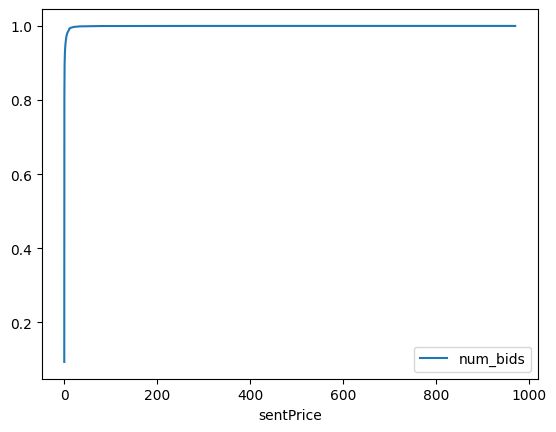

In [44]:
(train_data
.groupby("sentPrice")
.agg(num_bids = ("sentPrice", "count"))
.cumsum()
.apply(lambda x: x/x.max())
.plot())

<AxesSubplot: xlabel='logSentPrice'>

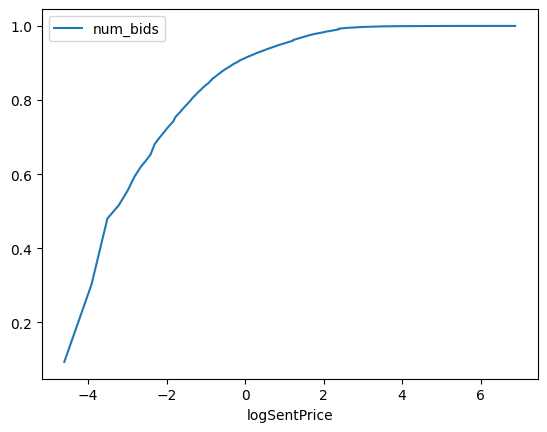

In [45]:
(train_data
.assign(logSentPrice = lambda x: x.sentPrice.apply(np.log))
.groupby("logSentPrice")
.agg(num_bids = ("logSentPrice", "count"))
.cumsum()
.apply(lambda x: x/x.max())
.plot())

In [46]:
train_data.bidFloorPrice.value_counts()

0.01    6797762
0.05     333847
0.1      184991
5.0        5033
Name: bidFloorPrice, dtype: int64

<AxesSubplot: xlabel='winBid'>

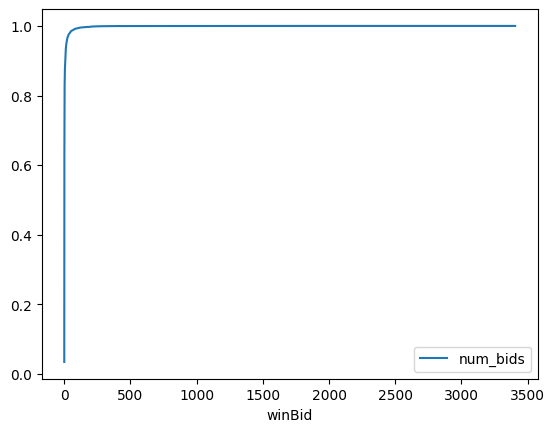

In [47]:
(train_data
.groupby("winBid")
.agg(num_bids = ("winBid", "count"))
.cumsum()
.apply(lambda x: x/x.max())
.plot())

<AxesSubplot: xlabel='logWinBid'>

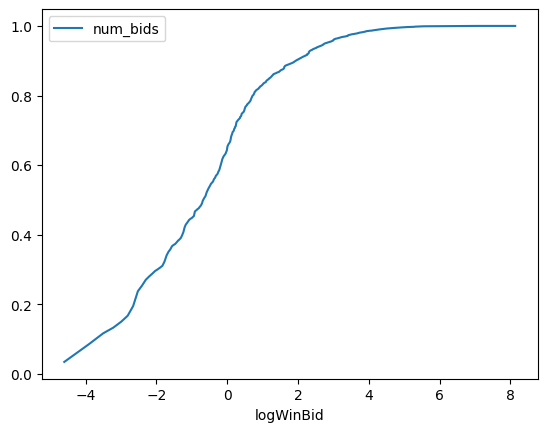

In [48]:
(train_data
.assign(logWinBid = lambda x: x.winBid.apply(np.log))
.groupby("logWinBid")
.agg(num_bids = ("logWinBid", "count"))
.cumsum()
.apply(lambda x: x/x.max())
.plot())

# Augment data

In [49]:
def augment_with_parsing(data: pd.DataFrame) -> pd.DataFrame:
    data["eventTimestamp"] = pd.to_datetime(data["eventTimestamp"], unit="ms")
    data["weekday"] = data["eventTimestamp"].dt.weekday
    data["hour"] = data["eventTimestamp"].dt.hour
    data["dayOfYear"] = data["eventTimestamp"].dt.day_of_year

    os_and_version = data["osAndVersion"].str.split("-", expand=True)
    data["os"] = os_and_version[0]
    data["osVersion"] = os_and_version[1]

    # data = augment_with_parsed_version(data, os_and_version[1].rename("osVersion"))
    # data = augment_with_parsed_version(data, data["appVersion"])
    # data = augment_with_parsed_version(data, data["mediationProviderVersion"].str.split("-", expand=True)[0].rename("mediationProviderVersion"))

    return data


def augment_with_parsed_version(data: pd.DataFrame, version: pd.Series) -> pd.DataFrame:
    versions = version.str.split(".", expand=True).astype("float")
    
    data[f"{version.name}Major"] = versions[0]
    data[f"{version.name}Minor"] = versions[1]
    data[f"{version.name}Patch"] = versions[2]

    return data

In [50]:
ad_size_orientation = {"320x50": "portrait", "320x480": "portrait", "728x90": "portrait", "768x1024": "portrait", "480x320": "landscape", "1024x768": "landscape"}
ad_size_device_type = {"320x50": "phone", "320x480": "phone", "728x90": "tablet", "768x1024": "tablet", "480x320": "phone", "1024x768": "tablet"}

In [51]:
train_data = augment_with_parsing(train_data)
train_data["deviceOrientation"] = train_data["size"].map(ad_size_orientation).astype("category")
train_data["deviceType"] = train_data["size"].map(ad_size_device_type).astype("category")

# Fit model

In [52]:
n_jobs = 2

In [53]:
from sklearn.preprocessing import OrdinalEncoder, QuantileTransformer, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, TransformedTargetRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

target_col = "winBid"
parsed_cols = ["osAndVersion", "appVersion", "mediationProviderVersion"]
excluded_cols = ["eventTimestamp", "correctModelName", "deviceId", "has_won"]
feature_cols = [col for col in train_data.columns.tolist() if col not in [target_col, *excluded_cols]]

train_X = train_data[feature_cols]
train_y = train_data[target_col]

categorical_features_mask = [str(dtype) in ["object", "category"] for dtype in train_X.dtypes.values]
categorical_features_index = [i for i, dtype in enumerate(train_X.dtypes.values) if str(dtype) in ["object", "category"]]

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

pipe = Pipeline([
    ("ct", ColumnTransformer([
        ("oe", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan), make_column_selector(dtype_include="object")),
        ("weekday_sin", sin_transformer(7), ["weekday"]),
        ("weekday_cos", cos_transformer(7), ["weekday"]),
        ("hour_sin", sin_transformer(24), ["hour"]),
        ("hour_cos", cos_transformer(24), ["hour"]),
        # ("ft", FunctionTransformer(func=np.log, inverse_func=np.exp), ["sentPrice", "np.exp"]),
    ], remainder="passthrough", n_jobs=n_jobs)),
    ("estimator", TransformedTargetRegressor(
        regressor=HistGradientBoostingRegressor(categorical_features=categorical_features_index),
        # transformer=QuantileTransformer(n_quantiles=1_000, subsample=200_000 output_distribution="normal", random_state=42)
        # func=np.log, inverse_func=np.exp
        )
    ),
])
param_grid = {
    "estimator__regressor__l2_regularization": [0.001], # no significant influence
    "estimator__regressor__learning_rate": [0.3],  # =0.3
    "estimator__regressor__max_iter": [200],  # >200
    "estimator__regressor__max_leaf_nodes": [64], # >64
}

In [54]:
from sklearn import set_config
set_config(display='diagram') 
pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(n_jobs=2, remainder='passthrough',
                                   transformers=[('oe',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9bd7af83a0>),
                                                 ('weekday_sin',
                                                  FunctionTransformer(func=<function sin_transformer.<locals>.<lambda> at 0x7f9bd7890ee0>),
                                                  ['wee...
                                                  FunctionTransformer(func=<function sin_transformer.<locals>.<lambda> at 0x7f9bd78c6160>),
                                                  ['hour']),
                                                 ('hour_cos',
                                                  FunctionTransformer(func=<function cos_transformer.<locals>.<lambda> at 0x7f9bd78c61f0>),
                                                  ['hour'])])),
                ('estimator',
                 TransformedTargetRegressor(regressor=HistGradientBoostingRegressor(categorical_features=[0,
                                                                                                          1,
                                                                                                          2,
                                                                                                          3,
                                                                                                          4,
                                                                                                          5,
                                                                                                          6,
                                                                                                          7,
                                                                                                          8,
                                                                                                          9,
                                                                                                          10,
                                                                                                          11,
                                                                                                          12,
                                                                                                          13,
                                                                                                          18,
                                                                                                          19,
                                                                                                          20,
                                                                                                          21])))])

In [55]:
search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=n_jobs, scoring="neg_root_mean_squared_error", verbose=4, error_score="raise").fit(train_X, train_y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


ValueError: could not convert string to float: 'banner'

In [ ]:
search_results = pd.DataFrame(search.cv_results_).sort_values("rank_test_score", ascending=True)
search_results.to_csv("search_results/10-adsize_features-tuned_HGBRegressor.csv")
search_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__regressor__l2_regularization,param_estimator__regressor__learning_rate,param_estimator__regressor__max_iter,param_estimator__regressor__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,149.745674,18.334229,25.934194,7.374476,0.001,0.3,200,64,{'estimator__regressor__l2_regularization': 0....,-14.505608,-14.588838,-14.487175,-14.781117,-14.964623,-14.665472,0.182255,1
1,180.016893,8.737514,29.727730,5.085002,0.001,0.1,200,64,{'estimator__regressor__l2_regularization': 0....,-14.826480,-14.837915,-14.707222,-15.134198,-15.292665,-14.959696,0.218009,2
0,207.945059,38.068412,31.896251,6.432260,0.001,0.03,200,64,{'estimator__regressor__l2_regularization': 0....,-15.182868,-15.213553,-15.153764,-15.610151,-15.799506,-15.391968,0.263054,3


In [ ]:
search.best_score_

-14.665472005547025

In [ ]:
search.best_params_

{'estimator__regressor__l2_regularization': 0.001,
 'estimator__regressor__learning_rate': 0.3,
 'estimator__regressor__max_iter': 200,
 'estimator__regressor__max_leaf_nodes': 64}

# Make predictions

In [ ]:
sample_submission = pd.read_csv("data/sample_submission.csv")
sample_submission.head()

,deviceId,winBid
0,6a049646837,0.01
1,6a0616b862a,0.01
2,6a0769d0ad5,0.01
3,6a0dc74cfeb,0.01
4,6a0e80f23a7,0.01


In [ ]:
test_data = pd.read_csv("data/test_data.csv")

In [ ]:
test_data = augment_with_parsing(test_data)
test_data["deviceOrientation"] = test_data["size"].map(ad_size_orientation).astype("category")
test_data["deviceType"] = test_data["size"].map(ad_size_device_type).astype("category")

In [ ]:
test_data.head()

,eventTimestamp,unitDisplayType,brandName,bundleId,appVersion,correctModelName,countryCode,deviceId,osAndVersion,connectionType,...,c4,size,mediationProviderVersion,bidFloorPrice,sentPrice,weekday,hour,dayOfYear,os,osVersion
0,2022-07-14 00:34:17.892,rewarded,Generic,com.loop.match3d,1245.35.0,Android 4 Tablet,US,6a0a94554cf,Android-4.0,3G,...,2.0,768x1024,11.4.3,0.05,0.06,3,0,195,Android,4.0
1,2022-07-07 16:18:27.978,interstitial,Generic,com.loop.match3d,1245.35.0,Android 4.0,ZA,6a0b0e59f45,Android-4.0,WIFI,...,6.0,320x480,11.4.3,0.01,0.16,3,16,188,Android,4.0
2,2022-07-09 18:55:39.412,interstitial,Motorola,com.YayySAL.DodgeAgent,13.0.02,Moto g(8) power lite,BR,6a0fa820c46,Android-10.0,WIFI,...,9.0,320x480,11.0.0,0.05,0.06,5,18,190,Android,10.0
3,2022-07-09 17:13:36.882,interstitial,Huawei,com.tintash.nailsalon,1.3.6,JDN2-AL00HN,IQ,6a142bdbea2,Android-9.0,WIFI,...,4.0,768x1024,11.3.3,0.01,0.05,5,17,190,Android,9.0
4,2022-07-07 16:33:20.823,banner,Generic,com.tilegarden.match3,1.8.52,Android 4.0,US,6a16943a771,Android-4.0,WIFI,...,5.0,320x50,11.4.3,0.01,0.03,3,16,188,Android,4.0


In [ ]:
win_bid_predictions = search.predict(test_data[feature_cols])
win_bid_predictions = pd.Series(win_bid_predictions).apply(lambda x: np.max([x, 0.01]))

In [ ]:
submission = pd.DataFrame({"deviceId": test_data["deviceId"], "winBid": win_bid_predictions})
submission.head()

,deviceId,winBid
0,6a0a94554cf,27.596567
1,6a0b0e59f45,2.831407
2,6a0fa820c46,3.732666
3,6a142bdbea2,2.057763
4,6a16943a771,1.100353


In [ ]:
submission.to_csv("submissions/submission_10.csv", header=True, index=False)